In [1]:
RA=211.181999999333
DEC=-14.9809999994415
coords=str(RA)+' '+str(DEC)

In [2]:
from astroquery.mast import Observations
from astroquery.mast import Catalogs
from astroquery.ned.core import RemoteServiceError
from astropy.table import Table
from IPython.display import Image
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

import pandas as pd

In [3]:
obs_table = Observations.query_region(coords,radius=5*u.arcsec)
print(obs_table[10:11])

intentType obs_collection provenance_name ... srcDen    obsid    distance
---------- -------------- --------------- ... ------ ----------- --------
   science           HLSP           K2SFF ...    nan 18001872655      0.0


In [4]:
obsid1 = '18001872655'
data_products = Observations.get_product_list(obsid1)
manifest = Observations.download_products(data_products)

INFO: Found cached file ./mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_correction.png with expected size 12934. [astroquery.query]
INFO: Found cached file ./mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_image.png with expected size 6842. [astroquery.query]
INFO: Found cached file ./mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_medians.png with expected size 3462. [astroquery.query]
INFO: Found cached file ./mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_skypos.png with expected size 7285. [astroquery.query]
INFO: Found cached file ./mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc.png with expected size 28993. [astroquery

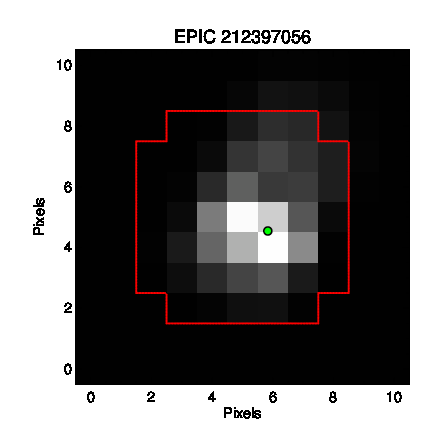

In [5]:
Image(filename='mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_image.png')

Some interesting data representation. 

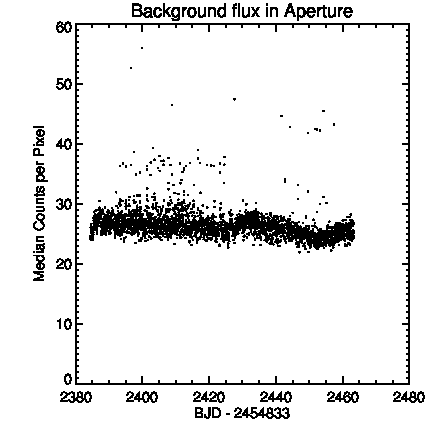

In [6]:
Image(filename='mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_medians.png')

The **"Corrected 6 hour precision"** has all of the corrections done and is best representative of what actually would have been received. 

Flux is relative to the mean. 

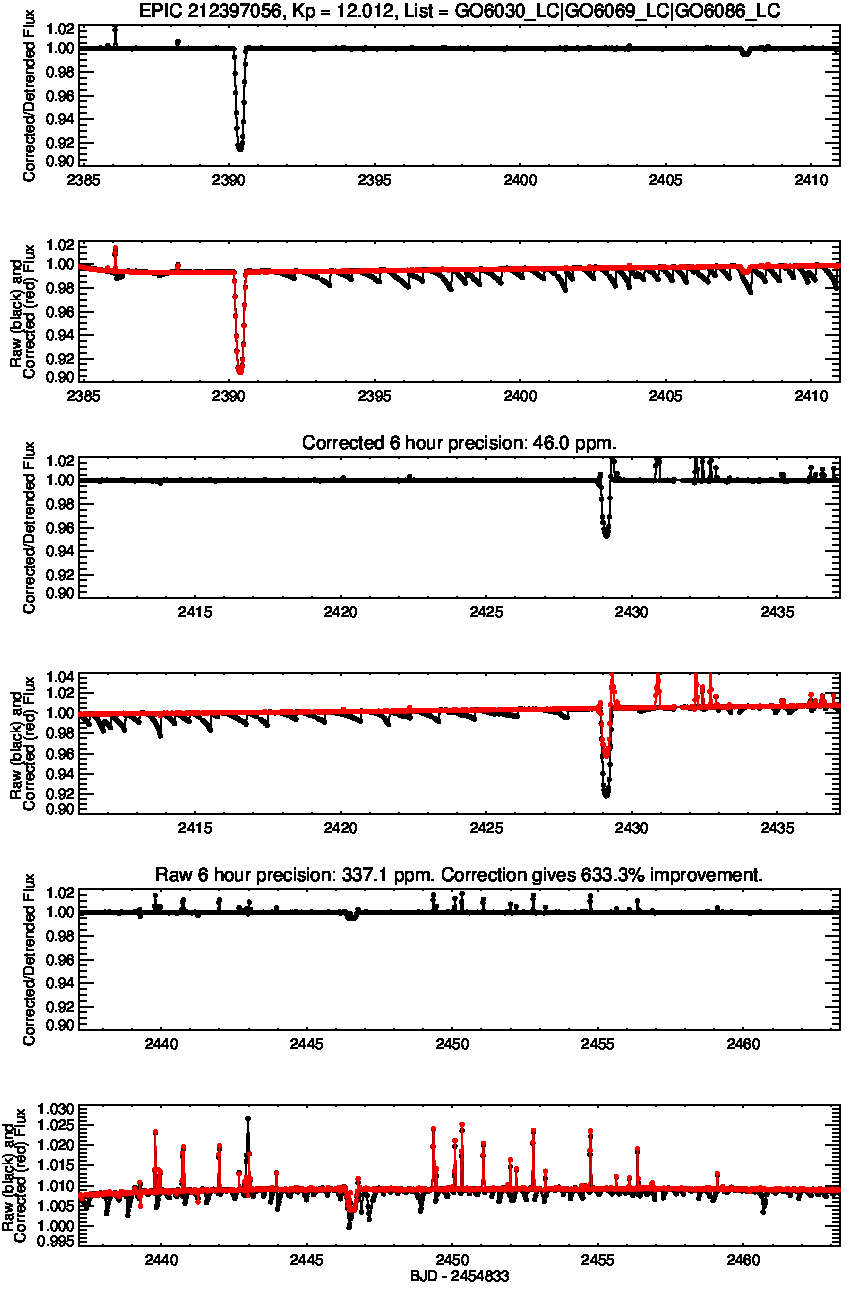

In [7]:
Image(filename='mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc.png')

In [8]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200811 11:18:39 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200811 11:18:39 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


Text(0, 0.5, 'Flux')

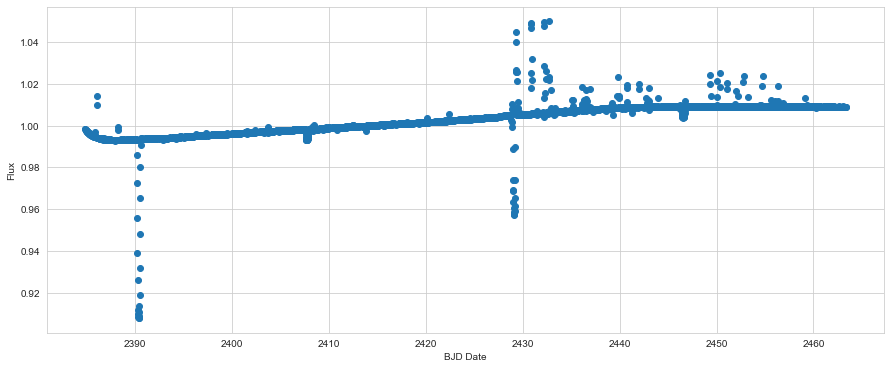

In [9]:
%matplotlib inline 
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
df1 = pd.read_csv('mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc-default-aper.txt', sep=",",skiprows=1,header=None)
dates=df1[0]
fluxes=df1[1]

plt.scatter(dates,fluxes)
plt.xlabel('BJD Date')
plt.ylabel('Flux')

In [10]:
errs=fluxes*0.01
glsp = periodbase.pgen_lsp(dates,fluxes,errs,magsarefluxes=True)

[I 200811 11:18:40 utils:141] NumExpr defaulting to 6 threads.


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([260, 261, 262, 263, 264, 265], dtype='int64'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [11]:
print(fluxes)

0       0.998281
1       0.998175
2       0.997977
3       0.997956
4       0.997836
          ...   
3458    1.009093
3459    1.008936
3460    1.008913
3461    1.008988
3462    1.008802
Name: 1, Length: 3463, dtype: float64


In [12]:
print(errs)

0       0.009983
1       0.009982
2       0.009980
3       0.009980
4       0.009978
          ...   
3458    0.010091
3459    0.010089
3460    0.010089
3461    0.010090
3462    0.010088
Name: 1, Length: 3463, dtype: float64


In [ ]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs, magsarefluxes=True)

In [ ]:
Image('checkplot.png')

In [ ]:
glsp